### 使用 ase phasediagram 模块绘制相图

In [1]:
from ase.phasediagram import PhaseDiagram
import pandas as pd

df = pd.read_csv("AlNb_1_8.csv")

In [27]:
df.shape

(166, 5)

In [2]:
df.head(n=10)

,structure_id,conf_symbol,mixing_energy_pa,Al,Nb
0,ICET-Training-No-00002,Al,0.000000,1.00,0.00
1,ICET-Training-No-00003,Nb,0.000000,0.00,1.00
2,ICET-Training-No-00010,AlNb,-0.344455,0.50,0.50
3,ICET-Training-No-00020,AlNb,-0.083087,0.50,0.50
4,ICET-Training-No-00040,Al2Nb,-0.197581,0.67,0.33
5,ICET-Training-No-00043,AlNb2,-0.201364,0.33,0.67
6,ICET-Training-No-00070,Al2Nb,-0.289453,0.67,0.33
7,ICET-Training-No-00073,AlNb2,-0.148247,0.33,0.67
8,ICET-Training-No-00100,Al2Nb,-0.190034,0.67,0.33
9,ICET-Training-No-00103,AlNb2,-0.204089,0.33,0.67


In [10]:
from ase.formula import Formula

# 能量需是 total mixing energy，而非 per atom，与 pymatgen 的 PhaseDiagram 模块输入数据要求有些区别
# 将 conf_symbol 和 mixing_energy_pa 写成 [(conf_symbol, energy), ...] 的形式
# 以便于 PhaseDiagram 的输入
references = []
for i in range(len(df)):
    conf_symbol = df["conf_symbol"][i]
    structure_composition = Formula(conf_symbol).count()
    # 获取化学式对应的原子数
    natoms = sum(structure_composition.values())
    energy = df["mixing_energy_pa"][i] * natoms
    references.append((conf_symbol, energy))

In [11]:
phasediagram = PhaseDiagram(references)
phasediagram

Species: Al, Nb
References: 166
0    Al             0.000
1    Nb             0.000
2    AlNb          -0.689
3    AlNb          -0.166
4    Al2Nb         -0.593
5    AlNb2         -0.604
6    Al2Nb         -0.868
7    AlNb2         -0.445
8    Al2Nb         -0.570
9    AlNb2         -0.612
10   Al3Nb         -0.810
11   Al2Nb2        -0.624
12   AlNb3         -0.582
13   Al3Nb         -1.130
14   Al2Nb2        -1.347
15   AlNb3         -0.538
16   Al3Nb         -0.970
17   Al2Nb2        -0.841
18   AlNb3         -0.730
19   Al3Nb         -1.065
20   Al2Nb2        -1.187
21   AlNb3         -0.515
22   Al3Nb          0.352
23   Al2Nb2        -0.489
24   AlNb3         -0.418
25   Al3Nb         -0.910
26   AlNb3         -0.612
27   Al3Nb         -0.600
28   AlNb3         -0.748
29   Al4Nb         -0.984
30   Al3Nb2        -0.612
31   Al3Nb2        -1.228
32   Al2Nb3        -0.583
33   Al2Nb3        -1.278
34   AlNb4         -0.567
35   Al4Nb         -1.197
36   Al3Nb2        -1.577
37   A

In [14]:
dir(phasediagram)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'decompose',
 'hull',
 'plot',
 'plot2d2',
 'plot2d3',
 'plot3d3',
 'plot3d4',
 'points',
 'references',
 'simplices',
 'species',
 'symbols',
 'verbose']

In [16]:
phasediagram.points

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ],
       [ 0.5       ,  0.5       , -0.3444552 ],
       [ 0.5       ,  0.5       , -0.08308722],
       [ 0.66666667,  0.33333333, -0.19758084],
       [ 0.33333333,  0.66666667, -0.20136404],
       [ 0.66666667,  0.33333333, -0.28945342],
       [ 0.33333333,  0.66666667, -0.14824667],
       [ 0.66666667,  0.33333333, -0.19003371],
       [ 0.33333333,  0.66666667, -0.20408898],
       [ 0.75      ,  0.25      , -0.20241208],
       [ 0.5       ,  0.5       , -0.15596784],
       [ 0.25      ,  0.75      , -0.14546586],
       [ 0.75      ,  0.25      , -0.28250895],
       [ 0.5       ,  0.5       , -0.33669171],
       [ 0.25      ,  0.75      , -0.13451739],
       [ 0.75      ,  0.25      , -0.24242358],
       [ 0.5       ,  0.5       , -0.21025362],
       [ 0.25      ,  0.75      , -0.18255941],
       [ 0.75      ,  0.25      , -0.26612534],
       [ 0.5       ,  0.5       , -0.296

In [13]:
phasediagram.hull

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [17]:
import numpy as np

# 统计不相同元素个数
np.unique(phasediagram.hull, return_counts=True)

(array([False,  True]), array([159,   7]))

<Axes: xlabel='Nb', ylabel='energy [eV/atom]'>

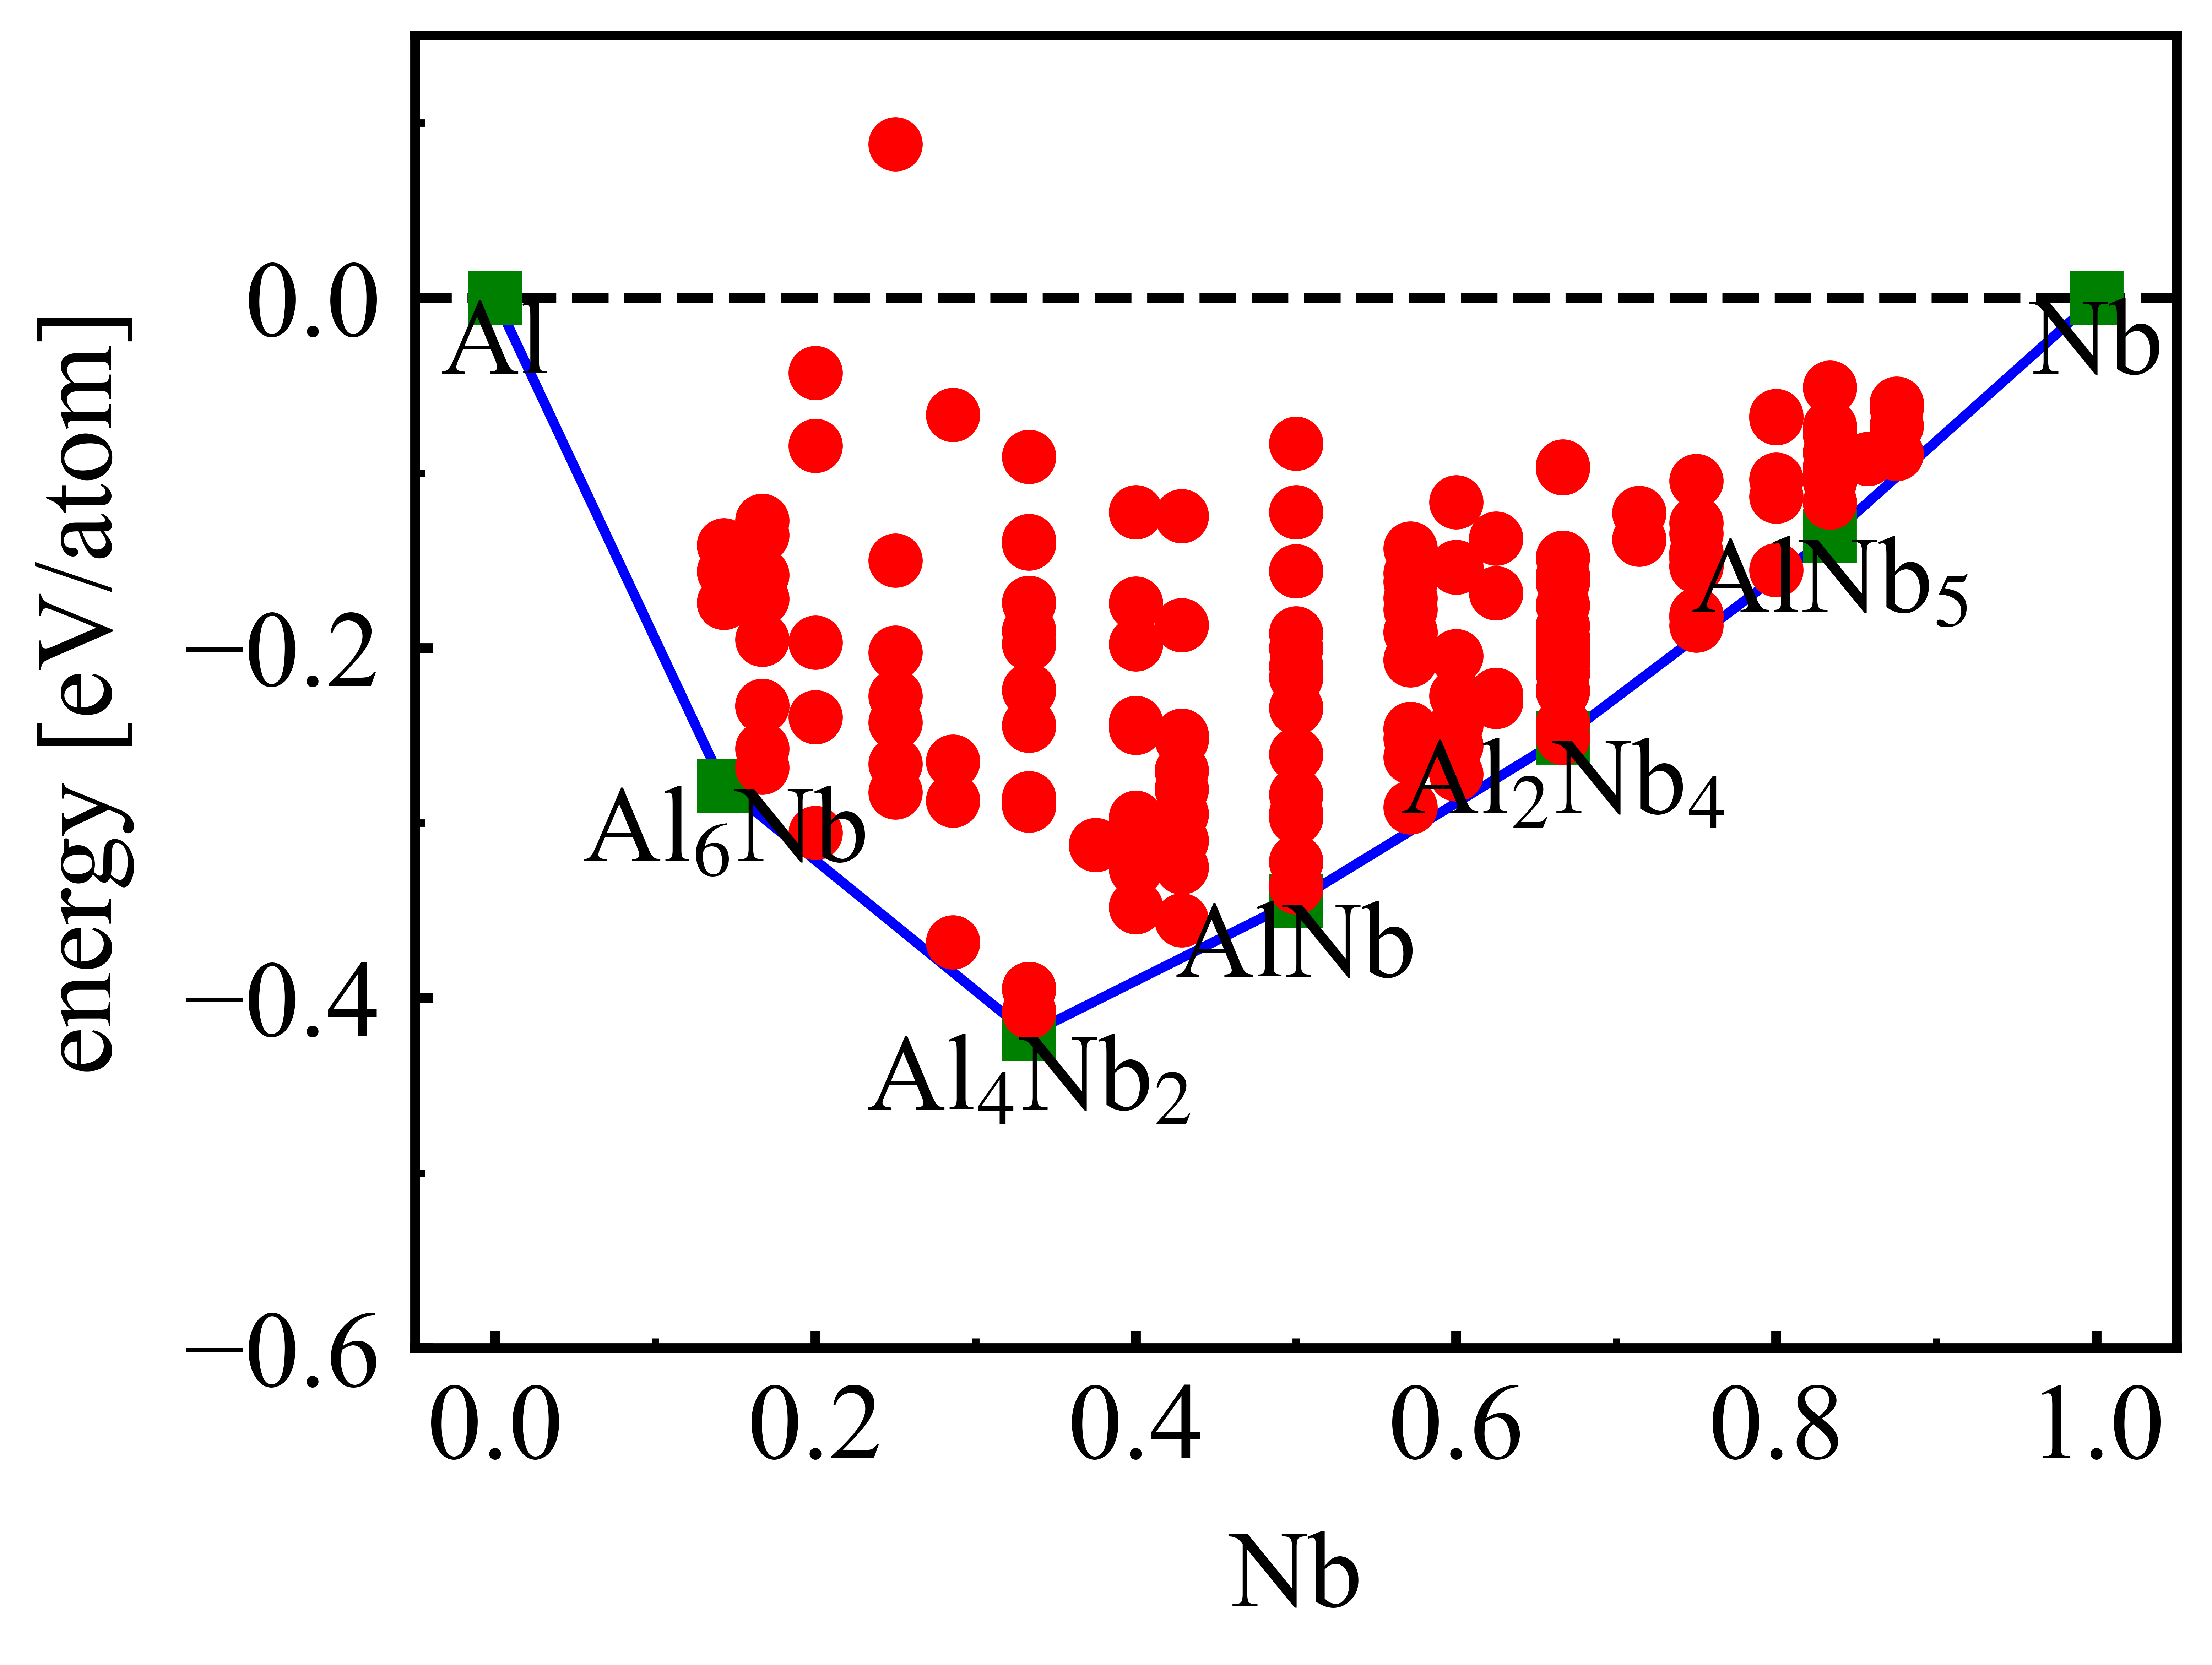

In [26]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from spt.plot_params import set_roman_plot_params
from matplotlib.ticker import MultipleLocator

set_roman_plot_params()
fig, ax = plt.subplots()
ax: Axes

ax.axhline(0, color="black", linestyle="--")
ax.set_ylim(-0.6, 0.15)
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

phasediagram.plot(
    ax=ax,
    only_label_simplices=True,  # 设为 True 只显示 convex hull 的点的 label
    # only_plot_simplices=True,  # 设为 True 只显示 convex hull 的点和连线，不显示其他点
)

In [29]:
# TODO: 使用 filter 参数
# TODO: 绘制三元相图